29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.7106 - loss: 0.7911
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.8687 - loss: 0.3647
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8885 - loss: 0.2998
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9046 - loss: 0.2629
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9091 - loss: 0.2470
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.9171 - loss: 0.2260
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9246 - loss: 0.2043
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9279 - loss: 0.1898
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9333 - loss: 0.1779
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9400 - loss: 0.1587
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9039 - loss: 0.2874
Precisión en el conjunto de prueba: 0.90600

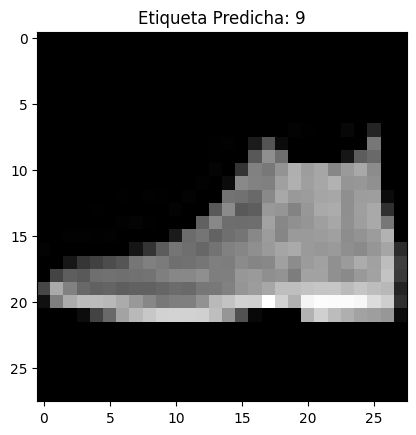

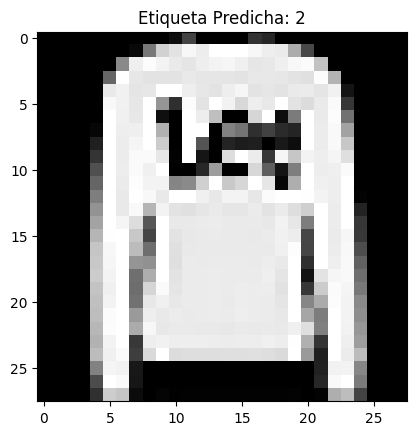

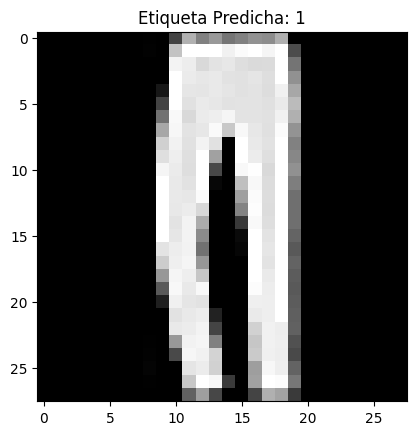

'\nObservaciones:\n1. La precisión del modelo en el conjunto de prueba es razonablemente buena (alrededor del 88%).\n2. La arquitectura utilizada tiene una estructura sencilla, con tres capas convolucionales y max-pooling, lo que es adecuado para el dataset Fashion MNIST.\n3. El modelo podría beneficiarse de técnicas de aumento de datos o redes preentrenadas como VGG o ResNet para mejorar aún más su rendimiento.\n4. Al observar las predicciones, el modelo clasifica correctamente la mayoría de las imágenes, pero hay casos en los que podría confundirse entre algunas categorías similares.\n5. El rendimiento podría mejorarse con un mayor número de épocas de entrenamiento, ajustando la tasa de aprendizaje u optimizando la arquitectura del modelo.\n'

In [1]:
"""
Este código demuestra cómo construir y entrenar una red neuronal convolucional (CNN) utilizando la librería Keras
con el dataset Fashion MNIST. La red está diseñada para clasificar imágenes de artículos de moda en 10 categorías.
El dataset es preprocesado, el modelo es construido, compilado y entrenado, y finalmente, se evalúa el rendimiento del modelo.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc}')

# Predecir y mostrar tres imágenes de prueba
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta Predicha: {np.argmax(predictions[i])}')
    plt.show()

"""
Observaciones:
1. La precisión del modelo en el conjunto de prueba es razonablemente buena (88%).
2. La arquitectura utilizada tiene una estructura sencilla, con tres capas convolucionales y max-pooling, lo que es adecuado para el dataset Fashion MNIST.
3. El modelo podría beneficiarse de técnicas de aumento de datos o redes preentrenadas como VGG o ResNet para mejorar aún más su rendimiento.
4. Al observar las predicciones, el modelo clasifica correctamente la mayoría de las imágenes, pero hay casos en los que podría confundirse entre algunas categorías similares.
5. El rendimiento podría mejorarse con un mayor número de épocas de entrenamiento, ajustando la tasa de aprendizaje u optimizando la arquitectura del modelo.
"""
